In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import uuid

In [3]:
os.path.isfile("data/caribbean_ports.csv")
caribbean_ports = pd.read_csv("data/caribbean_ports.csv")
os.path.isfile("data/cruise_cancellations.csv")
cruise_cancellations = pd.read_csv("data/cruise_cancellations.csv")
os.path.isfile("data/voyage_options.csv")
voyage_df = pd.read_csv("data/voyage_options.csv")
os.path.isfile("data/cruise_pics.csv")
ab_pics = pd.read_csv('data/cruise_pics.csv')

## **I. Summary Stats**

### **Dataset Summary**

In [4]:
caribbean_ports.describe()

,port_id,latitude,longitude,avg_annual_visitors,avg_port_fee_usd,local_attractions_score,avg_customer_satisfaction,excursion_variety_index,avg_disembark_rate,avg_shore_spend_per_passenger,seasonality_score
count,50.00000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,18.470906,-72.804902,7.061286e+05,10.706200,4.440000,8.19820,5.980000,0.764000,112.894200,0.566200
std,14.57738,5.560868,7.250157,4.517732e+05,5.430777,2.865417,1.27086,3.040475,0.165603,58.994124,0.284461
min,1.00000,10.096600,-84.364500,7.195900e+04,-3.500000,1.000000,6.12000,1.000000,0.510000,-45.000000,0.110000
25%,13.25000,13.441650,-79.151925,2.761048e+05,5.802500,2.250000,7.37250,4.000000,0.640000,56.592500,0.350000
50%,25.50000,18.832350,-72.470400,6.993720e+05,12.055000,4.000000,8.27000,6.000000,0.790000,117.295000,0.570000
75%,37.75000,23.696650,-66.013100,1.065037e+06,14.460000,6.000000,9.05000,9.000000,0.897500,163.442500,0.795000
max,50.00000,27.270500,-61.757600,1.492646e+06,18.920000,15.000000,12.50000,10.000000,1.200000,197.660000,0.990000


In [5]:
caribbean_ports.head(5)

,port_id,port_name,country_or_territory,region,port_type,latitude,longitude,avg_annual_visitors,avg_port_fee_usd,local_attractions_score,avg_customer_satisfaction,excursion_variety_index,avg_disembark_rate,avg_shore_spend_per_passenger,seasonality_score
0,1,Cozumel,Mexico,Western,Private,23.7406,-66.7748,187848,13.75,6,8.23,2,0.82,175.22,0.99
1,2,Costa Maya,Mexico,Western,Eco/Nature,13.4943,-65.7182,667075,13.77,3,9.74,10,0.52,100.07,0.78
2,3,Progreso,Mexico,Western,Major,18.9991,-83.1489,177948,12.11,9,8.78,3,0.69,156.40,0.44
3,4,Belize City,Belize,Western,Private,20.3673,-76.0384,452690,4.53,4,12.50,1,0.81,157.05,0.18
4,5,Roatán,Honduras,Western,Private,10.8129,-82.1033,549046,17.20,1,6.39,8,0.75,43.05,0.80


### **Handling Missing Data and Impossible Values**

In [6]:
print(caribbean_ports.isna().sum().sort_values(ascending=False))

port_id                          0
port_name                        0
country_or_territory             0
region                           0
port_type                        0
latitude                         0
longitude                        0
avg_annual_visitors              0
avg_port_fee_usd                 0
local_attractions_score          0
avg_customer_satisfaction        0
excursion_variety_index          0
avg_disembark_rate               0
avg_shore_spend_per_passenger    0
seasonality_score                0
dtype: int64


In [7]:
# Check for invalid avg_port_fee_usd
print(caribbean_ports[caribbean_ports['avg_port_fee_usd'] < 0])

# Check for invalid local_attractions_score
print(caribbean_ports[(caribbean_ports['local_attractions_score'] < 1) | (caribbean_ports['local_attractions_score'] > 10)])

# Check for invalid avg_customer_satisfaction
print(caribbean_ports[(caribbean_ports['avg_customer_satisfaction'] < 1) | (caribbean_ports['avg_customer_satisfaction'] > 10)])

# Check for invalid avg_disembark_rate
print(caribbean_ports[(caribbean_ports['avg_disembark_rate'] < 0) | (caribbean_ports['avg_disembark_rate'] > 1)])

# Check for invalid avg_shore_spend_per_passenger
print(caribbean_ports[caribbean_ports['avg_shore_spend_per_passenger'] < 0])

    port_id port_name country_or_territory   region port_type  latitude  \
21       22   Antigua  Antigua and Barbuda  Eastern     Major   15.4549   

    longitude  avg_annual_visitors  avg_port_fee_usd  local_attractions_score  \
21   -71.9317               815313              -3.5                        3   

    avg_customer_satisfaction  excursion_variety_index  avg_disembark_rate  \
21                       9.19                        9                0.95   

    avg_shore_spend_per_passenger  seasonality_score  
21                          82.52               0.88  
    port_id   port_name country_or_territory   region port_type  latitude  \
15       16  St. Thomas    US Virgin Islands  Eastern     Major   12.1357   

    longitude  avg_annual_visitors  avg_port_fee_usd  local_attractions_score  \
15   -82.0101               489792             14.75                       15   

    avg_customer_satisfaction  excursion_variety_index  avg_disembark_rate  \
15                     

In [8]:
def clean_group_mean(df, column, valid_min, valid_max):
    valid = df[(df[column] >= valid_min) & (df[column] <= valid_max)]
    return valid.groupby('country_or_territory')[column].transform('mean')

# 1. avg_port_fee_usd (should be >= 0)
mask = caribbean_ports['avg_port_fee_usd'] < 0
valid_means = clean_group_mean(caribbean_ports, 'avg_port_fee_usd', 0, float('inf'))
caribbean_ports.loc[mask, 'avg_port_fee_usd'] = valid_means[mask]

# 2. local_attractions_score (1–10)
mask = (caribbean_ports['local_attractions_score'] < 1) | (caribbean_ports['local_attractions_score'] > 10)
valid_means = clean_group_mean(caribbean_ports, 'local_attractions_score', 1, 10)
caribbean_ports.loc[mask, 'local_attractions_score'] = valid_means[mask]

# 3. avg_customer_satisfaction (1–10)
mask = (caribbean_ports['avg_customer_satisfaction'] < 1) | (caribbean_ports['avg_customer_satisfaction'] > 10)
valid_means = clean_group_mean(caribbean_ports, 'avg_customer_satisfaction', 1, 10)
caribbean_ports.loc[mask, 'avg_customer_satisfaction'] = valid_means[mask]

# 4. avg_disembark_rate (0–1)
mask = (caribbean_ports['avg_disembark_rate'] < 0) | (caribbean_ports['avg_disembark_rate'] > 1)
valid_means = clean_group_mean(caribbean_ports, 'avg_disembark_rate', 0, 1)
caribbean_ports.loc[mask, 'avg_disembark_rate'] = valid_means[mask]

# 5. avg_shore_spend_per_passenger (>= 0)
mask = caribbean_ports['avg_shore_spend_per_passenger'] < 0
valid_means = clean_group_mean(caribbean_ports, 'avg_shore_spend_per_passenger', 0, float('inf'))
caribbean_ports.loc[mask, 'avg_shore_spend_per_passenger'] = valid_means[mask]

In [9]:
caribbean_ports.describe()

,port_id,latitude,longitude,avg_annual_visitors,avg_port_fee_usd,local_attractions_score,avg_customer_satisfaction,excursion_variety_index,avg_disembark_rate,avg_shore_spend_per_passenger,seasonality_score
count,50.00000,50.000000,50.000000,5.000000e+01,49.000000,49.000000,49.000000,50.000000,49.000000,49.000000,50.000000
mean,25.50000,18.470906,-72.804902,7.061286e+05,10.996122,4.224490,8.110408,5.980000,0.755102,116.116531,0.566200
std,14.57738,5.560868,7.250157,4.517732e+05,5.081090,2.451745,1.120417,3.040475,0.154773,54.980235,0.284461
min,1.00000,10.096600,-84.364500,7.195900e+04,3.090000,1.000000,6.120000,1.000000,0.510000,26.900000,0.110000
25%,13.25000,13.441650,-79.151925,2.761048e+05,5.960000,2.000000,7.350000,4.000000,0.640000,76.310000,0.350000
50%,25.50000,18.832350,-72.470400,6.993720e+05,12.110000,4.000000,8.230000,6.000000,0.790000,121.170000,0.570000
75%,37.75000,23.696650,-66.013100,1.065037e+06,14.520000,6.000000,8.960000,9.000000,0.890000,163.530000,0.795000
max,50.00000,27.270500,-61.757600,1.492646e+06,18.920000,9.000000,9.960000,10.000000,1.000000,197.660000,0.990000


During the data validation process, no missing (null) values were found across any columns in the caribbean_ports dataset. However, upon further inspection using summary statistics, several variables contained impossible values outside their expected ranges, such as negative port fees, customer satisfaction scores above 10, and disembarkation rates exceeding 1. To address these issues, invalid entries were imputed by replacing them with the mean of valid values from the same country_or_territory. This ensured that the corrections respected the appropriate business logic while maintaining consistency within each country group.

### **Insights**

In [10]:
region_visitors = caribbean_ports.groupby('region')['avg_annual_visitors'].mean()
print(region_visitors)

region
Bahamas     693904.875000
Eastern     766951.812500
Southern    812553.545455
Western     569725.000000
Name: avg_annual_visitors, dtype: float64


Ports in the Southern Caribbean attract the highest average number of annual visitors (over 812,000), followed by the Eastern Caribbean. In contrast, the Bahamas and Western regions receive significantly fewer visitors on average.

In [11]:
port_type_spend = caribbean_ports.groupby('port_type')['avg_shore_spend_per_passenger'].mean()
print(port_type_spend)

port_type
Boutique      119.862727
Eco/Nature    117.466875
Major         123.653000
Private       104.601667
Name: avg_shore_spend_per_passenger, dtype: float64


Passengers tend to spend the most at Major ports (123.65 USD on average), followed closely by Boutique and Eco/Nature ports. Private ports show the lowest average shore spending at about 93.09 USD per passenger.

In [12]:
pivot_cust_sat = caribbean_ports.pivot_table(values='avg_customer_satisfaction', index='region', columns='port_type', aggfunc='mean')
print(pivot_cust_sat)

port_type  Boutique  Eco/Nature   Major   Private
region                                           
Bahamas    9.205000         NaN  6.5600  8.414000
Eastern    8.386667    8.638333  7.9740  8.105000
Southern   7.817500    7.804000     NaN  8.585000
Western    7.755000    7.810000  8.5375  7.043333


Customer satisfaction is highest at Boutique ports across all regions, especially in the Bahamas with an average score of 9.21. Major ports generally receive lower satisfaction scores compared to Boutique and Private ports. The missing values in the pivot table occur because there are no Eco/Nature ports in the Bahamas and no Major ports in the Southern region.

In [13]:
top_satisfaction = caribbean_ports[['country_or_territory', 'avg_customer_satisfaction']].sort_values(by='avg_customer_satisfaction', ascending=False).head(5)
print(top_satisfaction)

      country_or_territory  avg_customer_satisfaction
6                 Honduras                       9.96
1                   Mexico                       9.74
18  British Virgin Islands                       9.65
25                 Grenada                       9.56
9                  Bahamas                       9.51


Honduras stands out with the highest average customer satisfaction score (9.96), followed by Mexico, the British Virgin Islands, Grenada, and the Bahamas, all with scores above 9.5. These ports appear to offer the most positive experiences for cruise passengers.

In [14]:
top_attractions = caribbean_ports[['port_name', 'country_or_territory', 'local_attractions_score']] \
    .sort_values(by='local_attractions_score', ascending=False) \
    .head(5)

print(top_attractions)

        port_name country_or_territory  local_attractions_score
2        Progreso               Mexico                      9.0
37   Port Antonio              Jamaica                      9.0
10  Half Moon Cay              Bahamas                      8.0
39      Cabo Rojo          Puerto Rico                      8.0
9          Bimini              Bahamas                      8.0


Progreso and Port Antonio stand out with the highest local attractions scores (9.0), followed closely by Half Moon Cay, St. Lucia, and Bimini with scores of 8.0. This suggests these ports offer a broader range of attractions compared to other Caribbean destinations.

In [15]:
country_summary = caribbean_ports.groupby('country_or_territory').agg(
    total_annual_visitors=('avg_annual_visitors', 'sum'),
    avg_customer_satisfaction=('avg_customer_satisfaction', 'mean')
).reset_index()

country_summary = country_summary.sort_values(by='avg_customer_satisfaction', ascending=False)

print(country_summary)

      country_or_territory  total_annual_visitors  avg_customer_satisfaction
6   British Virgin Islands                1555934                   9.560000
11                 Grenada                 831239                   9.560000
22       US Virgin Islands                 579145                   9.240000
0      Antigua and Barbuda                 815313                   9.190000
3                 Barbados                 790976                   9.180000
15                  Mexico                1032871                   8.916667
20               St. Lucia                 641460                   8.810000
9                 Dominica                 466880                   8.600000
4                   Belize                 953959                   8.460000
2                  Bahamas                5551239                   8.380000
1                    Aruba                 275281                   8.310000
13                Honduras                1790048                   8.280000

British Virgin Islands and Grenada report the highest average customer satisfaction scores, each achieving 9.56. Despite not having the highest visitor volumes, these destinations offer experiences that passengers rate extremely highly. In contrast, larger markets such as the Dominican Republic and Venezuela attract significant numbers of visitors but show noticeably lower satisfaction levels, suggesting that higher traffic does not always translate into better passenger experiences.

### **Findings**

The exploratory analysis indicates that cruise passengers are most attracted to ports offering a combination of strong local attractions and specialized experiences, such as Boutique ports. Regions with higher visitor volumes, like the Southern and Eastern Caribbean, do not necessarily correlate with higher customer satisfaction, suggesting that passenger experience is more closely tied to port characteristics than to overall traffic. Ports classified as Major drive the highest shore spending, yet their satisfaction scores tend to be lower compared to Boutique and Private ports, highlighting a potential trade-off between economic gain and visitor experience. At the country level, smaller territories such as the British Virgin Islands and Grenada report the highest customer satisfaction scores, while larger markets like the Dominican Republic and Venezuela show noticeably lower ratings. Furthermore, the identification and correction of invalid data ensured that conclusions were based on consistent and realistic figures. The results suggest that enhancing local attractions and improving specialized experiences could be more effective strategies for ports aiming to increase both visitor satisfaction and economic impact. However, it is important to note that the dataset had some initial inconsistencies, including impossible values for several key variables, which required careful correction. In addition, not all region and port type combinations were represented, potentially limiting the generalizability of some findings across the broader Caribbean cruise market.

Based on the data, Lobster Land should prioritize partnering with or operating in Boutique ports, as they consistently receive the highest customer satisfaction scores across all regions. Although Major ports attract higher spending per passenger, Boutique ports strike a balance between strong spending and a superior passenger experience—an important factor for brand positioning. The Bahamas and Eastern Caribbean also stand out as attractive regions due to high visitor volumes and strong satisfaction scores. Additionally, ports like Progreso and Port Antonio, with top local attractions scores, suggest strong tourism value and engagement opportunities. Focusing on high-satisfaction, mid-to-high-spend destinations will help Lobster Land deliver a premium yet enjoyable cruise experience from day one.

## **II. Segmentation and Targeting**

### **Data Loading and Exploration**

In [17]:
df = pd.read_csv('data/caribbean_ports.csv')
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
port_id                          0
port_name                        0
country_or_territory             0
region                           0
port_type                        0
latitude                         0
longitude                        0
avg_annual_visitors              0
avg_port_fee_usd                 0
local_attractions_score          0
avg_customer_satisfaction        0
excursion_variety_index          0
avg_disembark_rate               0
avg_shore_spend_per_passenger    0
seasonality_score                0
dtype: int64


In [18]:
# Remove impossible values
df = df[df['avg_annual_visitors'] >= 0]
df = df[df['avg_port_fee_usd'] >= 0]
df = df[df['avg_shore_spend_per_passenger'] >= 0]
df = df[(df['avg_customer_satisfaction'] >= 1) & (df['avg_customer_satisfaction'] <= 10)]
df = df[(df['local_attractions_score'] >= 1) & (df['local_attractions_score'] <= 10)]
df = df[(df['avg_disembark_rate'] >= 0) & (df['avg_disembark_rate'] <= 1)]

In [19]:
# Summary statistics for numeric variables
numeric_cols = [
    'avg_annual_visitors', 'avg_port_fee_usd', 'local_attractions_score',
    'avg_customer_satisfaction', 'excursion_variety_index', 'avg_disembark_rate',
    'avg_shore_spend_per_passenger', 'seasonality_score', 'latitude', 'longitude'
]
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_cols])

print("\nSummary Statistics for Numeric Variables after Cleaning:")
df[numeric_cols].describe()


Summary Statistics for Numeric Variables after Cleaning:


,avg_annual_visitors,avg_port_fee_usd,local_attractions_score,avg_customer_satisfaction,excursion_variety_index,avg_disembark_rate,avg_shore_spend_per_passenger,seasonality_score,latitude,longitude
count,4.500000e+01,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,7.345383e+05,11.390222,4.155556,8.076889,6.022222,0.753556,113.094444,0.567556,18.673378,-72.370378
std,4.626601e+05,4.916183,2.485920,1.114352,2.927059,0.154068,55.055792,0.276793,5.589324,7.445726
min,7.195900e+04,3.090000,1.000000,6.120000,1.000000,0.510000,26.900000,0.110000,10.096600,-84.364500
25%,2.752810e+05,6.850000,2.000000,7.350000,4.000000,0.640000,50.020000,0.350000,13.477500,-79.280000
50%,7.909760e+05,12.330000,4.000000,8.170000,6.000000,0.770000,113.420000,0.570000,18.999100,-71.516400
75%,1.070545e+06,14.520000,6.000000,8.810000,9.000000,0.890000,163.180000,0.780000,23.740600,-65.725800
max,1.492646e+06,18.920000,9.000000,9.960000,10.000000,1.000000,197.660000,0.990000,27.270500,-61.757600


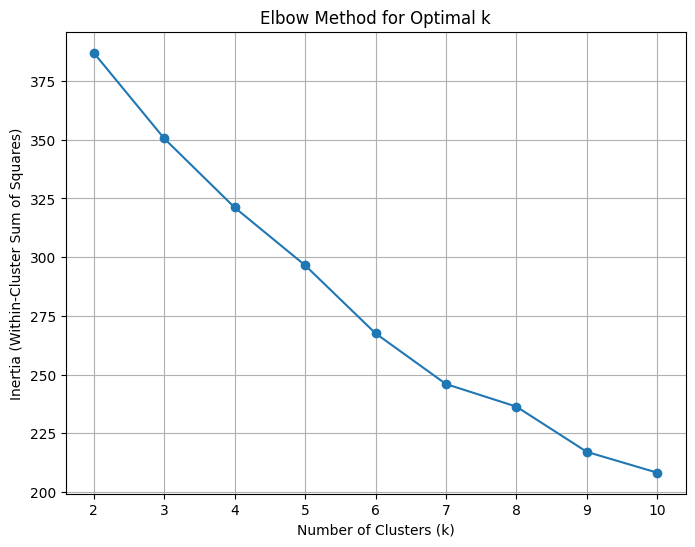

In [20]:
# Elbow Method to find optimal k
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [ ]:
final_kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
df['cluster'] = final_kmeans.fit_predict(X_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_annual_visitors', y='avg_shore_spend_per_passenger', hue='cluster', palette='Set1', data=df)
plt.title('Clusters: Annual Visitors vs Shore Spend per Passenger')
plt.xlabel('Average Annual Visitors (millions)')
plt.ylabel('Average Shore Spend per Passenger (USD)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

*As per the elbow chart, the optimal value seems to be 7, but after our scatter plot of the cluster, the plots didn't seems to occupy these many clusters, as we can see the cluster 6 isn't able to show these many data points to so some analysis on that. hence, for this analysis, we will be using k as 6.*

In [21]:
final_kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df['cluster'] = final_kmeans.fit_predict(X_scaled)

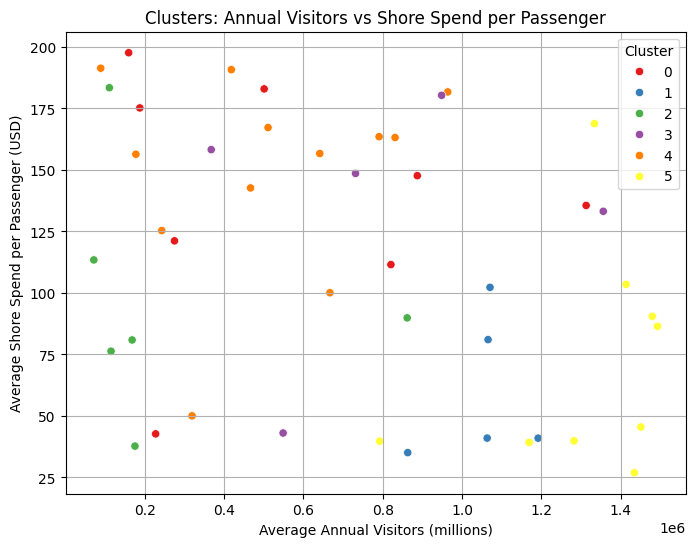

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_annual_visitors', y='avg_shore_spend_per_passenger', hue='cluster', palette='Set1', data=df)
plt.title('Clusters: Annual Visitors vs Shore Spend per Passenger')
plt.xlabel('Average Annual Visitors (millions)')
plt.ylabel('Average Shore Spend per Passenger (USD)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()